# Problema de segmentação de Clientes

https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

Descrição do problema

A Análise de Personalidade do Cliente é uma análise detalhada dos clientes ideais de uma empresa. Ajuda uma empresa a entender melhor seus clientes e facilita a modificação de produtos de acordo com as necessidades, comportamentos e preocupações específicas de diferentes tipos de clientes.

A análise da personalidade do cliente ajuda uma empresa a modificar seu produto com base em seus clientes-alvo de diferentes tipos de segmentos de clientes. Por exemplo, em vez de gastar dinheiro para comercializar um novo produto para cada cliente no banco de dados da empresa, uma empresa pode analisar qual segmento de cliente tem mais probabilidade de comprar o produto e, em seguida, comercializar o produto apenas nesse segmento específico. 

## 1. Importação de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display import HTML
from IPython.display import Image

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, RobustScaler

## 2. Importação base de dados

In [2]:
df_raw = pd.read_csv(r'C:\Users\pfern\Desktop\Machine Learning\Projetos\Clusterização\marketing_campaign.csv', sep = '\t')
df_raw

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## 3. Limpeza de dados

### 3.1. colunas snake case

In [3]:
df_raw.columns
old_cols = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
new_cols = list(map(lambda x: x.lower(), old_cols))
df_raw.columns = new_cols

### 3.2. dados lower case

In [4]:
df_raw['education'] = df_raw['education'].str.lower()
df_raw['marital_status'] = df_raw['marital_status'].str.lower()
df_raw['dt_customer'] = df_raw['dt_customer'].str.lower()

### 3.3. dtypes

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2240 non-null   int64  
 1   year_birth           2240 non-null   int64  
 2   education            2240 non-null   object 
 3   marital_status       2240 non-null   object 
 4   income               2216 non-null   float64
 5   kidhome              2240 non-null   int64  
 6   teenhome             2240 non-null   int64  
 7   dt_customer          2240 non-null   object 
 8   recency              2240 non-null   int64  
 9   mntwines             2240 non-null   int64  
 10  mntfruits            2240 non-null   int64  
 11  mntmeatproducts      2240 non-null   int64  
 12  mntfishproducts      2240 non-null   int64  
 13  mntsweetproducts     2240 non-null   int64  
 14  mntgoldprods         2240 non-null   int64  
 15  numdealspurchases    2240 non-null   i

In [6]:
# converte df_customer de object para data
df_raw['dt_customer'] = pd.to_datetime(df_raw['dt_customer'], format = '%d-%m-%Y')

### 3.4. dados NA

C:\Users\pfern\anaconda3\envs\campanha_mkt\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='income', ylabel='Density'>

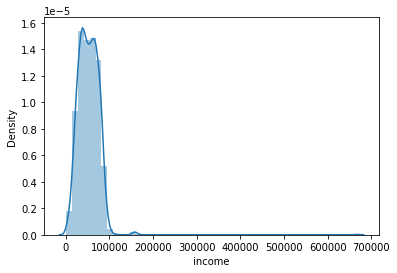

In [7]:
sns.distplot(df_raw['income'])

In [8]:
df_raw.loc[df_raw[df_raw['income'].isnull()].index, 'income'] = np.mean(df_raw['income'])

### 3.5. conferindo variáveis categóricas

In [9]:
df = df_raw.copy()
df

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,5524,1957,graduation,single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,graduation,single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,graduation,together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,graduation,together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,phd,married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,graduation,married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,phd,together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,graduation,divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,master,together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [10]:
df['marital_status'].value_counts()

married     864
together    580
single      480
divorced    232
widow        77
alone         3
absurd        2
yolo          2
Name: marital_status, dtype: int64

In [11]:
df.loc[df[df['marital_status'] == 'yolo'].index, 'marital_status'] = 'single'

In [12]:
df['education'].value_counts()

graduation    1127
phd            486
master         370
2n cycle       203
basic           54
Name: education, dtype: int64

## 4. Redução de Dimensionalidade

In [13]:
df.columns = ['id_', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response']

In [14]:
df.drop(columns = ['id_', 'z_revenue', 'z_costcontact'], axis = 1, inplace = True)

## 7. Preparação dos dados

In [15]:
df_1 = df.copy()

### 7.3. Encoding (dados categóricos) 

In [16]:
# label encoding: Marital_status
le = LabelEncoder()
df_1['marital_status'] = le.fit_transform(df_1['marital_status'])

# Ordinal encoding: Education
education_dict = {'basic': 1, '2n cycle': 2, 'graduation': 3, 'master': 4, 'phd': 5}
df_1['education'] = df_1['education'].map(education_dict)

In [18]:
# Nature Transformation: dt_customer
df_1['dt_customer_day'] = df_1['dt_customer'].dt.day
df_1['dt_customer_month'] = df_1['dt_customer'].dt.month
df_1['dt_customer_year'] = df_1['dt_customer'].dt.year

In [21]:
df_1.drop(columns = ['dt_customer'], axis = 1, inplace = True)

In [22]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year_birth           2240 non-null   int64  
 1   education            2240 non-null   int64  
 2   marital_status       2240 non-null   int32  
 3   income               2240 non-null   float64
 4   kidhome              2240 non-null   int64  
 5   teenhome             2240 non-null   int64  
 6   recency              2240 non-null   int64  
 7   mntwines             2240 non-null   int64  
 8   mntfruits            2240 non-null   int64  
 9   mntmeatproducts      2240 non-null   int64  
 10  mntfishproducts      2240 non-null   int64  
 11  mntsweetproducts     2240 non-null   int64  
 12  mntgoldprods         2240 non-null   int64  
 13  numdealspurchases    2240 non-null   int64  
 14  numwebpurchases      2240 non-null   int64  
 15  numcatalogpurchases  2240 non-null   i

## 8. Machine Learning (k-mean)

### 8.2. Modelo K-means

In [54]:
kmean_df1 = KMeans(n_clusters = 2)
kmean_df1.fit(df_1)

KMeans(n_clusters=2)

In [55]:
labels = kmean_df1.labels_

#### 8.3. Classificando grupo por clusters

In [56]:
df_2 = df_1.copy()

In [57]:
df_2['cluster_group'] = pd.Series(labels)

In [58]:
df_2[df_2['cluster_group'] == 0]

,year_birth,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,...,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,dt_customer_day,dt_customer_month,dt_customer_year,cluster_group
1,1954,3,4,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0,8,3,2014,0
3,1984,3,5,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,0,10,2,2014,0
7,1985,5,3,33454.0,1,0,32,76,10,56,...,0,0,0,0,0,0,8,5,2013,0
8,1974,5,5,30351.0,1,0,19,14,0,24,...,0,0,0,0,0,1,6,6,2013,0
9,1950,5,5,5648.0,1,1,68,28,0,6,...,0,0,0,0,0,0,13,3,2014,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,1984,3,4,11012.0,1,0,82,24,3,26,...,0,0,0,0,0,0,16,3,2013,0
2231,1970,4,4,44802.0,0,0,71,853,10,143,...,0,0,0,0,0,0,21,8,2012,0
2232,1986,3,4,26816.0,0,0,50,5,1,6,...,0,0,0,0,0,0,17,8,2012,0
2234,1974,3,3,34421.0,1,0,81,3,3,7,...,0,0,0,0,0,0,1,7,2013,0


In [59]:
df_2[df_2['cluster_group'] == 1]

,year_birth,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,...,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,dt_customer_day,dt_customer_month,dt_customer_year,cluster_group
0,1957,3,4,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,1,4,9,2012,1
2,1965,3,5,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,21,8,2013,1
4,1981,5,3,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,0,19,1,2014,1
5,1967,4,5,62513.0,0,1,16,520,42,98,...,0,0,0,0,0,0,9,9,2013,1
6,1971,3,2,55635.0,0,1,34,235,65,164,...,0,0,0,0,0,0,13,11,2012,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,1977,3,5,666666.0,1,0,23,9,14,18,...,0,0,0,0,0,0,2,6,2013,1
2235,1967,3,3,61223.0,0,1,46,709,43,182,...,0,0,0,0,0,0,13,6,2013,1
2236,1946,5,5,64014.0,2,1,56,406,0,30,...,0,0,1,0,0,0,10,6,2014,1
2237,1981,3,2,56981.0,0,0,91,908,48,217,...,1,0,0,0,0,0,25,1,2014,1


In [60]:
df_2[df_2['cluster_group'] == 2]

,year_birth,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,...,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,dt_customer_day,dt_customer_month,dt_customer_year,cluster_group


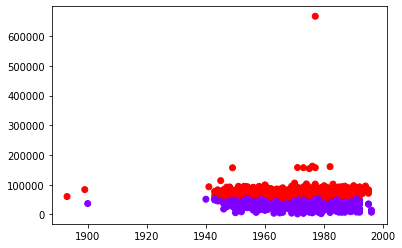

In [61]:
plt.scatter(df_2['year_birth'], df_2['income'], c = df_2['cluster_group'], cmap = 'rainbow')
plt.show()